**IBM HR Analytics Employee Attrition & Performance**

# Ejecución Inicial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#machine learning models
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Apartados de interés

# Introducción:
La retención de empleados es un desafío importante en el entorno empresarial actual, y la industria de la tecnología de la información no es una excepción. Las empresas como IBM se enfrentan al reto de retener a sus empleados más valiosos y reducir la rotación, ya que esto puede afectar la productividad, la estabilidad y la competitividad de la empresa.

# Definición de objetivo:
El objetivo de este proyecto es analizar los datos de rotación de empleados de IBM y utilizar técnicas de aprendizaje automático para predecir qué empleados son más propensos a abandonar la empresa.
Dado un conjunto de características de un empleado, el modelo será capaz de predecir si ese empleado tiene más probabilidades de abandonar la empresa o no.

# Contexto comercial:
Trabajamos para la empresa IBM, una empresa líder en tecnología de la información que emplea a miles de personas en todo el mundo. La rotación de empleados es un problema importante que enfrenta la empresa, ya que puede afectar la rentabilidad y la productividad de la empresa. Es nuestra tarea investigar y comprender los factores detrás de la rotación de empleados y desarrollar una estrategia para retener a los empleados más valiosos.

# Problema comercial:
Nuestra tarea es responder la siguiente pregunta:  **¿Existen patrones y relaciones entre los datos que nos permitan identificar perfiles de empleados que son más propensos a abandonar la empresa y aquellos que no lo son?**

# Contexto analítico:
Se nos ha proporcionado un conjunto de datos que contiene información sobre la edad, salario, satisfacción laboral y otros factores relacionados con la rotación de empleados en IBM. Vamos a utilizar técnicas de aprendizaje automático para construir un modelo predictivo que pueda predecir la rotación de empleados en el futuro. **Este es un problema de aprendizaje supervisado ya que los datos están etiquetados con información sobre si los empleados han abandonado la empresa o no.**

# Audiencia
La audiencia para este análisis podría ser el equipo de recursos humanos de la empresa que busca mejorar la retención de empleados y disminuir la rotación. También podría ser útil para la gerencia de IBM.

# Preguntas/Hipótesis
Algunas preguntas que podríamos intentar responder con el dataset son:

   - ¿Cuáles son los factores más influyentes en la decisión de los empleados de abandonar la empresa?
   - ¿Cómo afectan los niveles de satisfacción laboral y compromiso de los empleados en su decisión de abandonar la empresa?
   - ¿Hay alguna relación entre la edad y la rotación de los empleados?
   - ¿Cómo influyen la carga de trabajo, el salario y otros factores en la rotación de los empleados?
   - ¿Existen diferencias salariales significativas entre hombres y mujeres?

Algunas hipótesis que se podrían plantear son:

   - Los empleados con niveles bajos de satisfacción laboral son más propensos a abandonar la empresa.
   - Los empleados con mayores cargas de trabajo tienen más probabilidades de abandonar la empresa.
   - Los empleados más jóvenes son más propensos a abandonar la empresa que los mayores.
   - Los empleados que tienen que viajar largas distancias para llegar al trabajo tienen más probabilidades de abandonar la empresa.
   - Los empleados que ganan más tienen más probabilidades de quedarse en la empresa.
   - Existe una relación entre las oportunidades de promoción y el abandono de la empresa.

# Data Discovery
**Dataset a usar:  IBM HR Analytics Employee Attrition & Performance**
- Fuente: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [ ]:
url = 'https://raw.githubusercontent.com/Agostina-d-o/ds-coder/develop/WA_Fn-UseC_-HR-Employee-Attrition.csv'

df_hrIBM = pd.read_csv(url)

## Descripción de los campos


**Age	Employee's:**  Edad del empleado \
**Gender	Employee's:**  Género del empleado \
**BusinessTravel:**	 Frecuencia de viajes de negocios de los empleados \
**DailyRate**	Salario diario del empleado \
**Department**	Departamento de la empresa al que pertenece el empleado\
**DistanceFromHome**	Distancia en millas desde el hogar del empleado hasta el lugar de trabajo\
**Education** Área de estudio del empleado\
**EducationField**	Número total de empleados en la organización\
**EmployeeCount**	Total number of employees in the organization\
**EmployeeNumber**	Identificador único para cada registro de empleado\
**EnvironmentSatisfaction**	Satisfacción del empleado con su entorno laboral\
**HourlyRate**	Tarifa por hora para los empleados\
**JobInvolvement**	Nivel de compromiso requerido para el trabajo del empleado\
**JobLevel**	 Nivel de trabajo del empleado\
**JobRole**	 El papel del empleado en la organización\
**JobSatisfaction**	Satisfacción del empleado con su trabajo\
**MaritalStatus**	Estado civil del empleado\
**MonthlyIncome**	Ingreso mensual del empleado\
**MonthlyRate**	Tarifa salarial mensual para los empleados\
**NumCompaniesWorked** Número de empresas para las que trabajó el empleado\
**Over18**	Si el empleado tiene más de 18 años\
**OverTime**	 Si los empleados trabajan horas extra\
**PercentSalaryHike**	Tasa de aumento salarial para los empleados\
**PerformanceRating**	La calificación de rendimiento del empleado\
**RelationshipSatisfaction**	 Satisfacción del empleado con sus relaciones interpersonales\
**StandardHours**	Horas de trabajo estándar para los empleados\
**StockOptionLevel**	Nivel de opción de compra de acciones del empleado\
**TotalWorkingYears**	 Número total de años trabajados por el empleado\
**TrainingTimesLastYear**	Número de veces que los empleados asistieron a capacitación en el último año\
**WorkLifeBalance**	Percepción de los empleados sobre su equilibrio entre el trabajo y la vida personal\
**YearsAtCompany**	Número de años que los empleados han estado en la empresa\
**YearsInCurrentRole**	Número de años que el empleado ha estado en su rol actual\
**YearsSinceLastPromotion**	Número de años desde la última promoción del empleado\
**YearsWithCurrManager**	Número de años que el empleado ha estado con su gerente actual\
**Attrition**	Si el empleado abandona la organización

In [ ]:
pd.options.display.max_columns = None  # mostrar todas las columnas

df_hrIBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
rows=df_hrIBM.shape[0]
cols=df_hrIBM.shape[1]
print(f'Cantidad de filas: {rows}\nCantidad de columnas: {cols}')

Cantidad de filas: 1470
Cantidad de columnas: 35


In [ ]:
#Buscamos duplicados
df_hrIBM.duplicated().any()

False

In [ ]:
#Conteo y Porcentaje de valores nulos

count = df_hrIBM.count()
isna = df_hrIBM.isna().mean()
result = pd.concat([count, isna], axis=1)
result.columns = ["NotNull Count", "Pct of nulls"]
print(result)

                          NotNull Count  Pct of nulls
Age                                1470           0.0
Attrition                          1470           0.0
BusinessTravel                     1470           0.0
DailyRate                          1470           0.0
Department                         1470           0.0
DistanceFromHome                   1470           0.0
Education                          1470           0.0
EducationField                     1470           0.0
EmployeeCount                      1470           0.0
EmployeeNumber                     1470           0.0
EnvironmentSatisfaction            1470           0.0
Gender                             1470           0.0
HourlyRate                         1470           0.0
JobInvolvement                     1470           0.0
JobLevel                           1470           0.0
JobRole                            1470           0.0
JobSatisfaction                    1470           0.0
MaritalStatus               


**Quitamos las columnas que su valor no afectaba al análisis:**\
Over18: Todos los valores son 'Y'\
EmployeeCount: Todos los valores son 1.0\
StandardHours: Todos los valores son 80.0\
EmployeeNumber: Id del empleado

In [ ]:
df_hr_converted = df_hrIBM.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)


In [ ]:
df_hr_converted.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Visualizaciones y Conclusiones

In [ ]:
# Convertir la columna "Attrition" y "OverTime"  a booleana, y asignar "True" a los valores "Yes" y "False" a "No"
df_hr_converted['Attrition'] = df_hr_converted['Attrition'].map({'Yes': True, 'No': False})
df_hr_converted['OverTime'] = df_hr_converted['OverTime'].map({'Yes': True, 'No': False})

## Relación entre la edad y el ingreso mensual de los empleados
* A simple vista, parece haber una tendencia en la que los empleados más jóvenes tienden a tener ingresos mensuales más bajos en comparación con los empleados mayores, que tienen ingresos más altos.

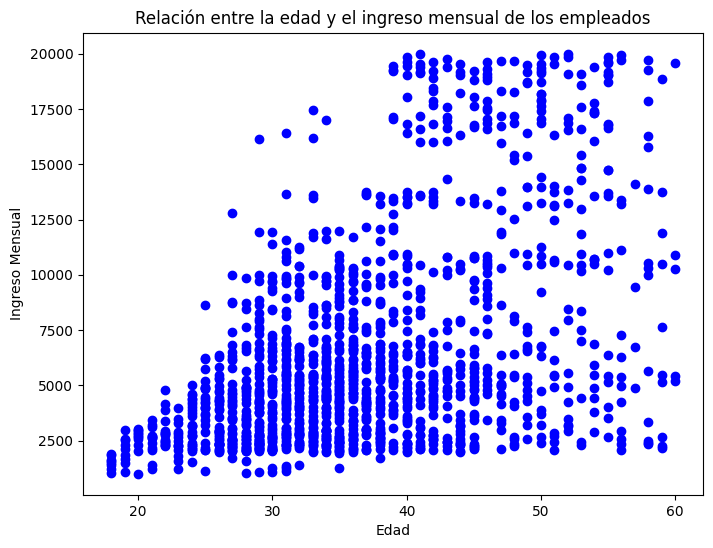

In [ ]:
data = df_hr_converted[['Age', 'MonthlyIncome']]

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(data['Age'], data['MonthlyIncome'], color='blue')
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Mensual')
ax.set_title('Relación entre la edad y el ingreso mensual de los empleados')

plt.show()

## Tasa de rotación por departamento
* Se puede observar que el departamento de ventas, seguido del dpto de RRHH tienen la tasa de rotación más alta. Esto puede indicar que los empleados en estos departamentos pueden estar experimentando mayores niveles de estrés, carga de trabajo y/o insatisfacción laboral, lo que lleva a una mayor tasa de rotación. Por otro lado, los departamentos de investigación y desarrollo pueden tener un entorno laboral más favorable y retener a sus empleados por más tiempo.

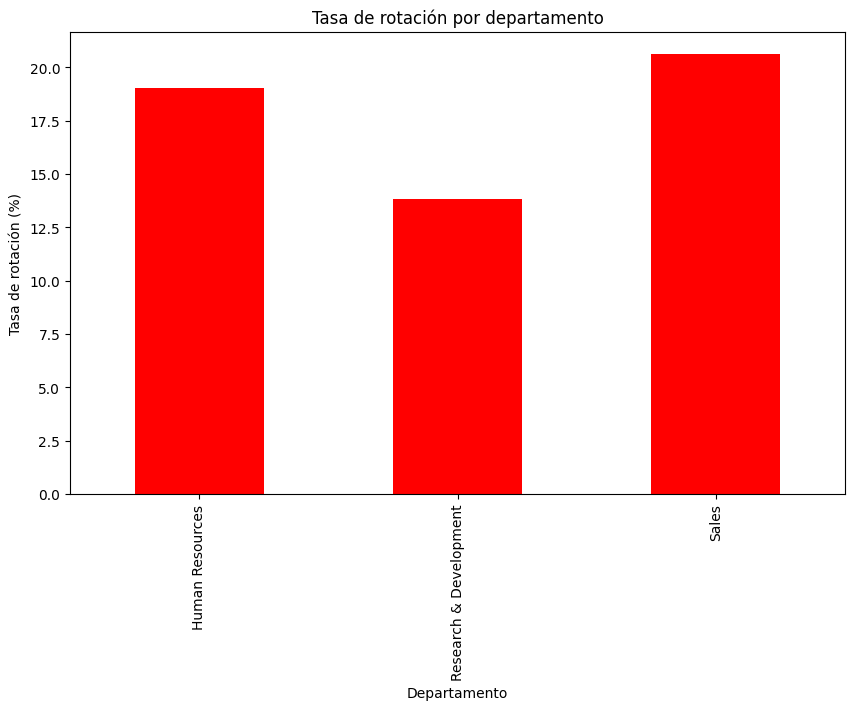

In [ ]:
dept_attrition = df_hr_converted.groupby('Department')['Attrition'].mean() * 100

fig, ax = plt.subplots(figsize=(10, 6))
dept_attrition.plot(kind='bar', ax=ax, color='red')

ax.set_xlabel('Departamento')
ax.set_ylabel('Tasa de rotación (%)')
ax.set_title('Tasa de rotación por departamento')

plt.show()

## Distribución de empleados por edad
* Los datos se han dividido en seis grupos de edad. El mayor porcentaje de empleados se encuentra en el grupo de edad de 30 a 40 años. En general, la mayoría de los empleados tienen entre 20 y 40 años.

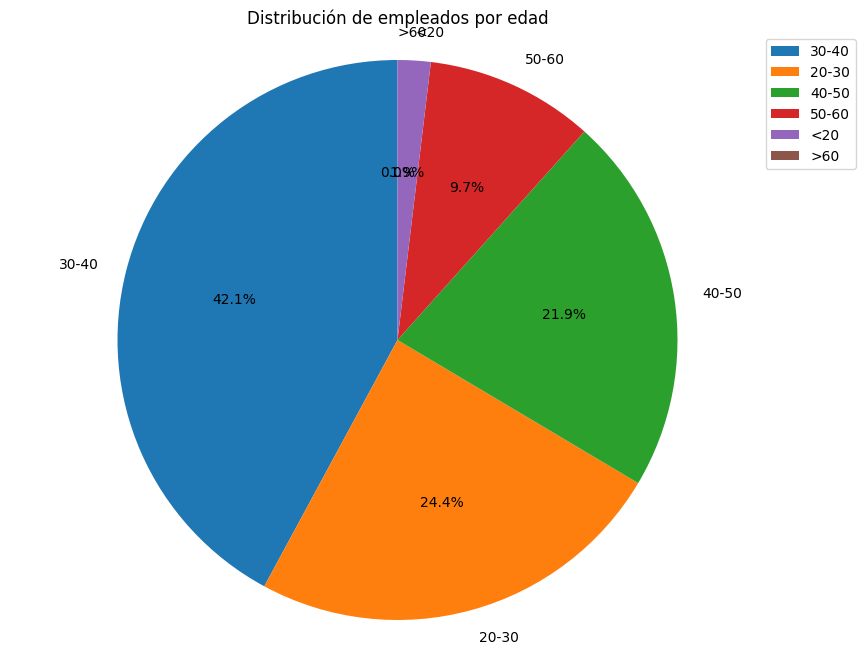

In [ ]:
# Dividir a los empleados en grupos de edad
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ["<20", "20-30", "30-40", "40-50", "50-60" ,">60"]
df_hr_converted['age_group'] = pd.cut(df_hr_converted['Age'], bins=bins, labels=labels, duplicates='drop')

# Contar el número de empleados en cada grupo de edad
age_counts = df_hr_converted['age_group'].value_counts()

# Graficar
fig, ax = plt.subplots(figsize=(10, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribución de empleados por edad")

plt.legend(bbox_to_anchor=(1.1, 1))  # Mover la leyenda fuera del gráfico
plt.show()
df_hr_converted.drop(columns=['age_group'], inplace=True)


## Distribución de salarios por género
* Podemos observar que ambos boxplots tienen una forma similar, con la mediana y los cuartiles ubicados en posiciones similares en ambas distribuciones. Sin embargo, el boxplot para el género masculino parece tener una mayor dispersión de los datos.
Vemos que algunos hombres que ganan salarios significativamente más altos que la mayoría de los demás hombres y mujeres en la empresa.

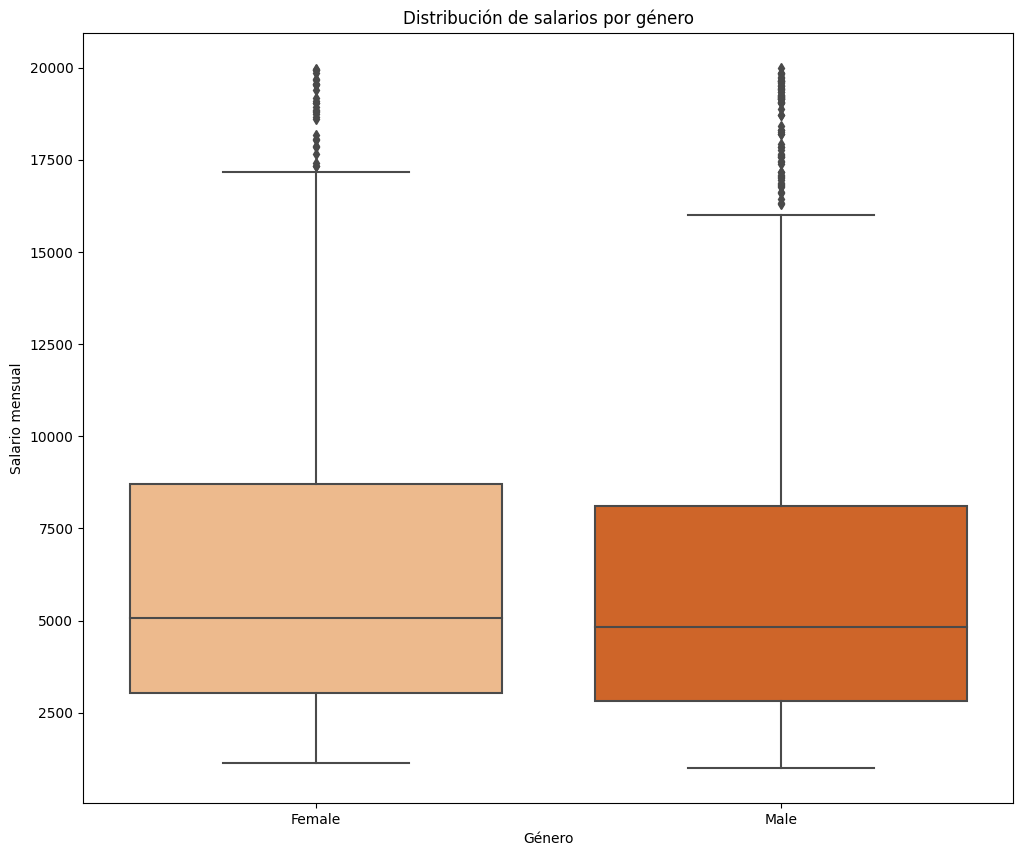

In [ ]:
# Filtrar los datos (salario y género)
data = df_hr_converted[['Gender', 'MonthlyIncome']]
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x='Gender', y='MonthlyIncome', data=data, palette='Oranges')

plt.xlabel('Género')
plt.ylabel('Salario mensual')
plt.title('Distribución de salarios por género')

plt.show()

## Distribución de la satisfacción laboral en empleados que abandonaron vs los que se mantuvieron
* Vemos que los empleados que abandonaron la empresa presentan una mayor densidad de valores bajos de satisfacción laboral en comparación con los empleados que se mantuvieron. Esto sugiere que la satisfacción laboral puede ser un factor importante en la decisión de abandonar la empresa.

<ipython-input-14-507461c38c76>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left['JobSatisfaction'], shade=True, color='red', label='Abandonaron')
<ipython-input-14-507461c38c76>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed['JobSatisfaction'], shade=True, color='green', label='Se mantuvieron')


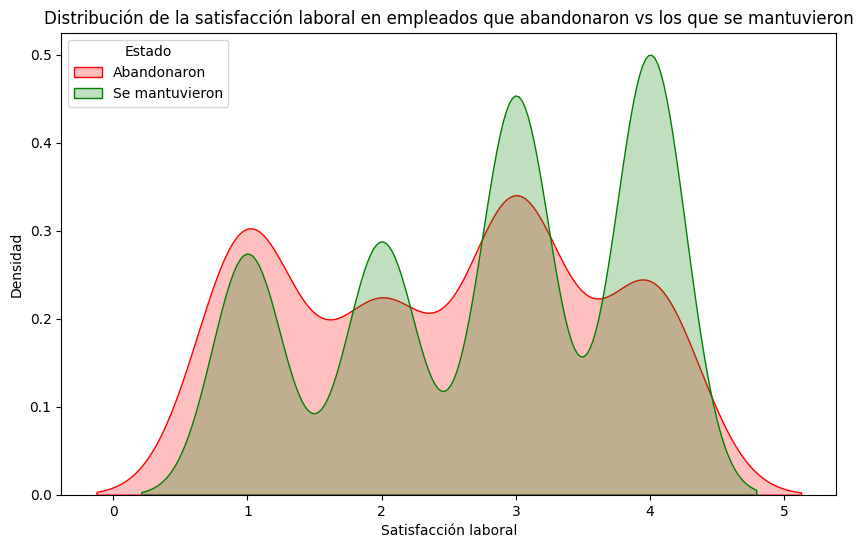

In [ ]:
data = df_hr_converted[['Attrition', 'JobSatisfaction']]

# Dividir los datos en dos grupos: los que abandonaron y los que se mantuvieron
left = data[data['Attrition'] == True]
stayed = data[data['Attrition'] == False]

plt.figure(figsize=(10, 6))

# Generar el gráfico de densidad para cada grupo
sns.kdeplot(left['JobSatisfaction'], shade=True, color='red', label='Abandonaron')
sns.kdeplot(stayed['JobSatisfaction'], shade=True, color='green', label='Se mantuvieron')
plt.legend(title='Estado', loc='upper left', labels=['Abandonaron', 'Se mantuvieron'])

plt.xlabel('Satisfacción laboral')
plt.ylabel('Densidad')
plt.title('Distribución de la satisfacción laboral en empleados que abandonaron vs los que se mantuvieron')

plt.show()

## Distribución de edades según rotación
* Se puede observar que la mediana de edad de los empleados que han abandonado la empresa es ligeramente menor que la de los empleados que se han quedado, lo que sugiere que los empleados más jóvenes son más propensos a abandonar la empresa. Además, también se puede ver que hay más valores atípicos en la distribución de los empleados que han abandonado la empresa, lo que indica una mayor variabilidad en la edad de los empleados que abandonan.

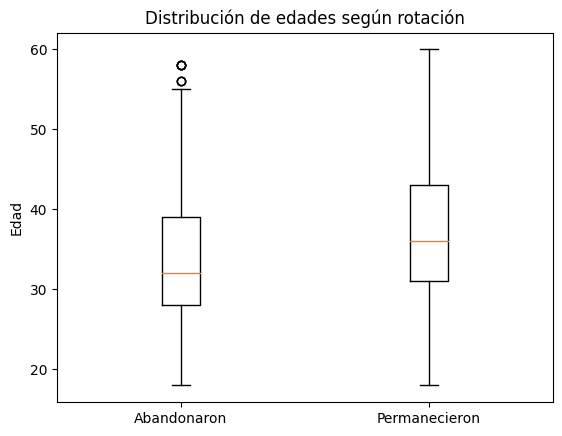

In [ ]:
left = df_hr_converted[df_hr_converted['Attrition'] == True]['Age']
stayed = df_hr_converted[df_hr_converted['Attrition'] == False]['Age']

fig, ax = plt.subplots()
ax.boxplot([left, stayed], labels=['Abandonaron', 'Permanecieron'])
ax.set_title('Distribución de edades según rotación')
ax.set_ylabel('Edad')
plt.show()

## Distribución de empleados por duración de empleo y abandono de la empresa

* Se observa que la tasa de abandono es más alta en los primeros años (1-5 años) y luego disminuye a medida que los empleados permanecen más tiempo en la empresa. Los empleados que han estado en la empresa durante más de 10 años tienen la tasa de abandono más baja.

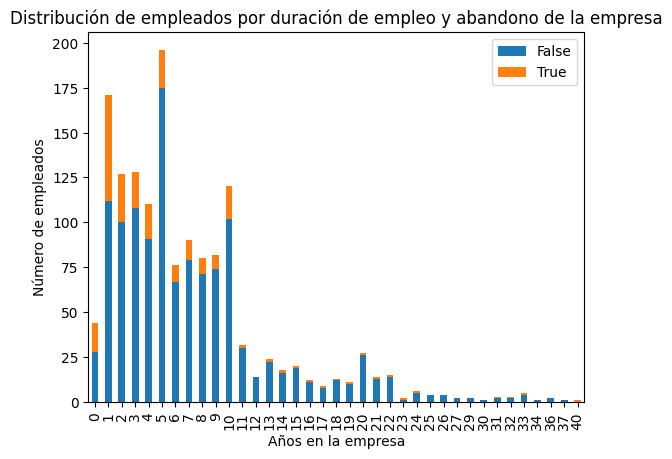

In [ ]:
attrition_by_years = df_hr_converted.groupby(['YearsAtCompany', 'Attrition']).size().unstack()

attrition_by_years.plot(kind='bar', stacked=True)

plt.xlabel('Años en la empresa')
plt.ylabel('Número de empleados')
plt.title('Distribución de empleados por duración de empleo y abandono de la empresa')
plt.legend(loc='upper right')
plt.show()

##Mapas de Correlacion de variables

<ipython-input-17-cc565dc1729d>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_grupo1 = df_grupo1.corr()


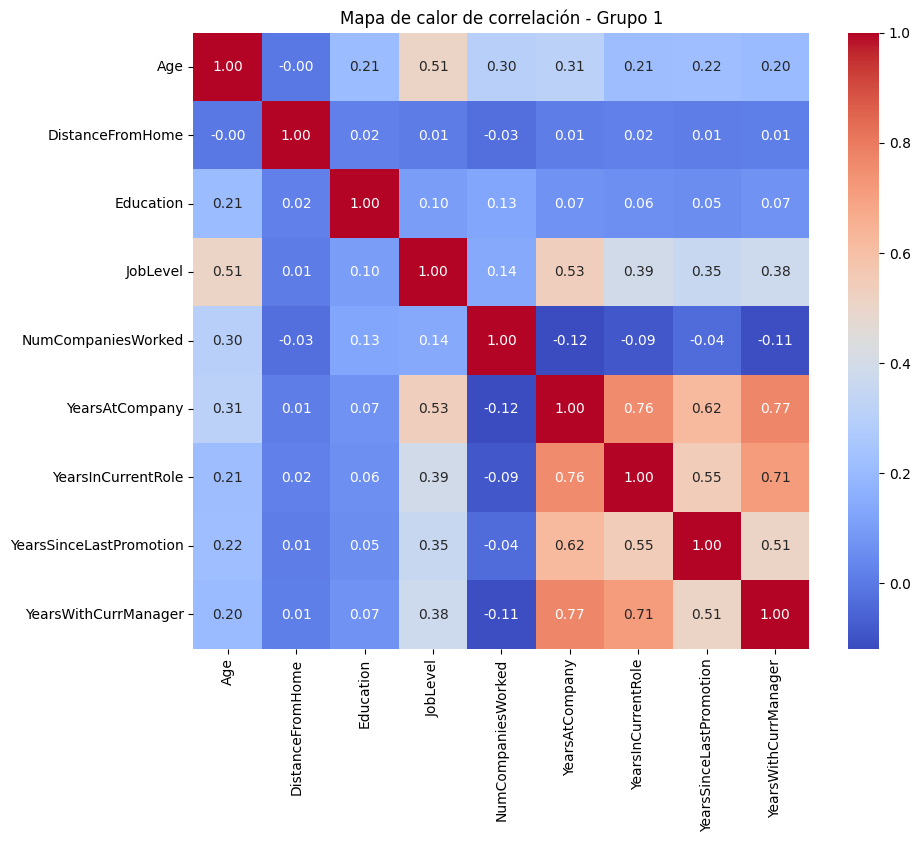

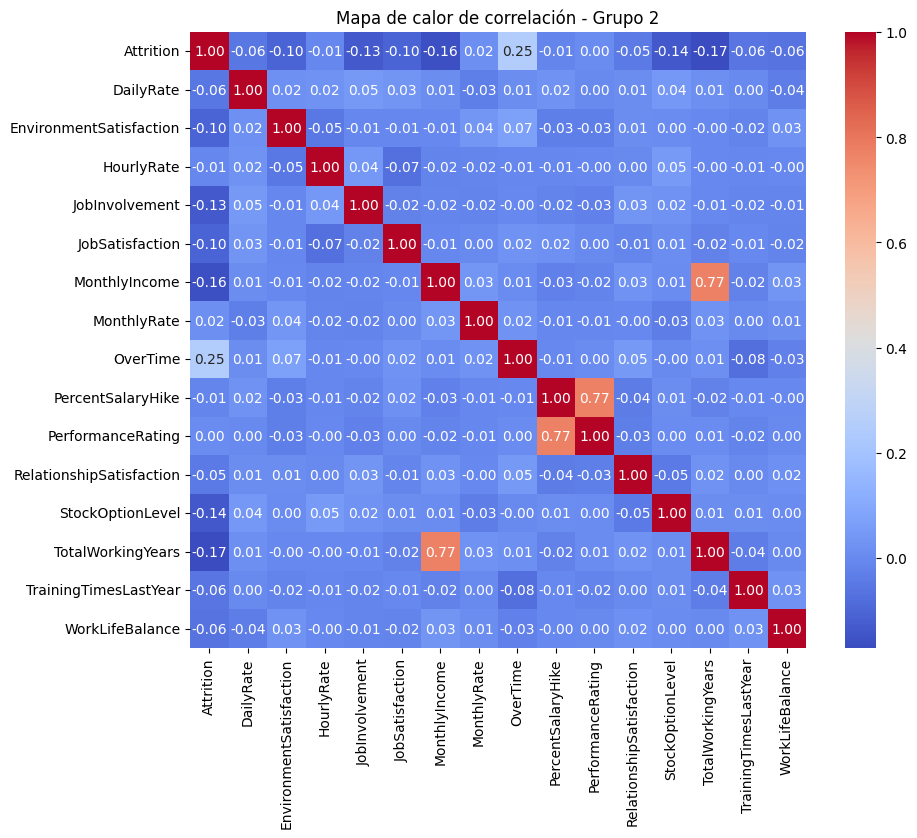

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame solo con las variables del Grupo 1
df_grupo1 = df_hr_converted[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
                'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'NumCompaniesWorked',
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Crear un nuevo DataFrame solo con las variables del Grupo 2
df_grupo2 = df_hr_converted[['Attrition', 'DailyRate', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'OverTime', 'PercentSalaryHike',
                'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance']]

corr_grupo1 = df_grupo1.corr()

corr_grupo2 = df_grupo2.corr()

# Crear el mapa de calor para el Grupo 1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_grupo1, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de calor de correlación - Grupo 1')
plt.show()

# Crear el mapa de calor para el Grupo 2
plt.figure(figsize=(10, 8))
sns.heatmap(corr_grupo2, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de calor de correlación - Grupo 2')
plt.show()


## Distribución de Rotación de Empleados por Género

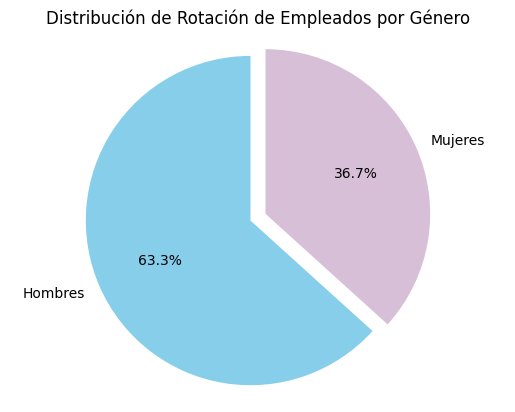

In [ ]:
import matplotlib.pyplot as plt

male_attrition = df_hrIBM[(df_hr_converted['Gender'] == 'Male') & (df_hrIBM['Attrition'] == 'Yes')]
female_attrition = df_hrIBM[(df_hr_converted['Gender'] == 'Female') & (df_hrIBM['Attrition'] == 'Yes')]

male_count = len(male_attrition)
female_count = len(female_attrition)

labels = ['Hombres', 'Mujeres']
sizes = [male_count, female_count]
colors = ['skyblue', 'thistle']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Distribución de Rotación de Empleados por Género')
plt.show()




##Distribución de género según rotación

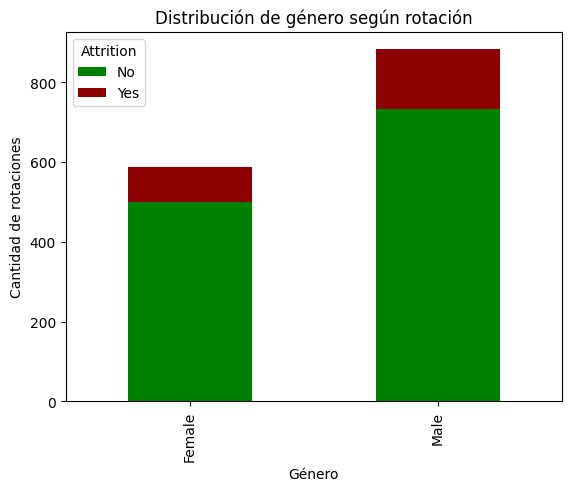

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rotation_counts = df_hrIBM.groupby('Gender')['Attrition'].value_counts().unstack()

sns.set_palette(['#008000', '#8B0000'])  # Verde oscuro para "No" y rojo oscuro para "Yes"
rotation_counts.plot(kind='bar', stacked=True)

plt.xlabel('Género')
plt.ylabel('Cantidad de rotaciones')
plt.title('Distribución de género según rotación')

plt.show()


## Recomendaciones post análisis exploratorio

Luego de realizar el análisis exploratorio de datos en el conjunto de datos,presento algunas de las recomendaciones basadas en las visualizaciones y conclusiones obtenidas:

1. La edad y la satisfacción laboral parecen ser factores importantes en la rotación de empleados. Los empleados más jóvenes y los que tienen niveles más bajos de satisfacción laboral tienden a abandonar la empresa con más frecuencia. Por lo tanto, se recomienda que la empresa se centre en mejorar factores que influyen en la satisfacción laboral y las oportunidades de desarrollo para los empleados jóvenes.

2. Se recomienda a la empresa que analice más detenidamente los problemas específicos en los departamentos con tasas de rotación más altas y tome medidas para abordarlos.

3. Se observa que la tasa de abandono es más alta en los primeros años (1-5 años), por lo tanto, se recomienda a la empresa que preste especial atención a la retención de los empleados durante los primeros años de su empleo, mediante la implementación de programas de capacitación y desarrollo.

# Pre-procesamiento de datos


In [ ]:
df_hr_converted.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,True,11,3,1,0,8,0,1,6,4,0,5
1,49,False,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,False,23,4,4,1,10,3,3,10,7,1,7
2,37,True,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,True,15,3,2,0,7,3,3,0,0,0,0
3,33,False,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,True,11,3,3,0,8,3,3,8,7,3,0
4,27,False,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,False,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
# Mostrar variables no numericas (categoricas)
categ = df_hr_converted.select_dtypes(exclude=['number'])
for col in categ.columns:
    print(f"{col}: {categ[col].unique()}")

Attrition: [ True False]
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: [ True False]


In [ ]:
#Importamos el labelencoder de scikit
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

# Convertir la columna "Attrition" y "OverTime" a entero, y asignar "1" a los valores "Yes" y "0" a "No"
df_hr_converted['Attrition'] = LE.fit_transform(df_hr_converted['Attrition'])
df_hr_converted['OverTime'] = LE.fit_transform(df_hr_converted['OverTime'])
# Gender --> Female = 0 , Male = 1
df_hr_converted['Gender'] = LE.fit_transform(df_hr_converted['Gender'])

In [ ]:
#Convertir variables categoricas a numericas (aquellas con más de 2 valores distintos)
columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_hr_converted[columns] = df_hr_converted[columns].apply(lambda x: x.astype('category').cat.codes+1)


In [ ]:
df_hr_converted.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,3,1102,3,1,2,2,2,0,94,3,2,8,4,3,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,2,3,1,61,2,2,7,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,3,1373,2,2,2,5,4,1,92,2,1,3,3,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,2,4,0,56,3,1,7,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,3,591,2,2,1,4,1,1,40,3,1,3,2,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2



Siguiendo el orden alfabético, quedarían así, comenzando la asignación en 1:

**BusinessTravel:** ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'] \
**Department:** ['Human Resources', 'Research & Development', 'Sales'] \
**EducationField:** ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree'] \
**JobRole:** ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']  \
**MaritalStatus:** ['Divorced', 'Married', 'Single']

#Seleccion de Variables (Feature Selection)
Correlacion

In [ ]:
correl=df_hr_converted.corr()

<Axes: >

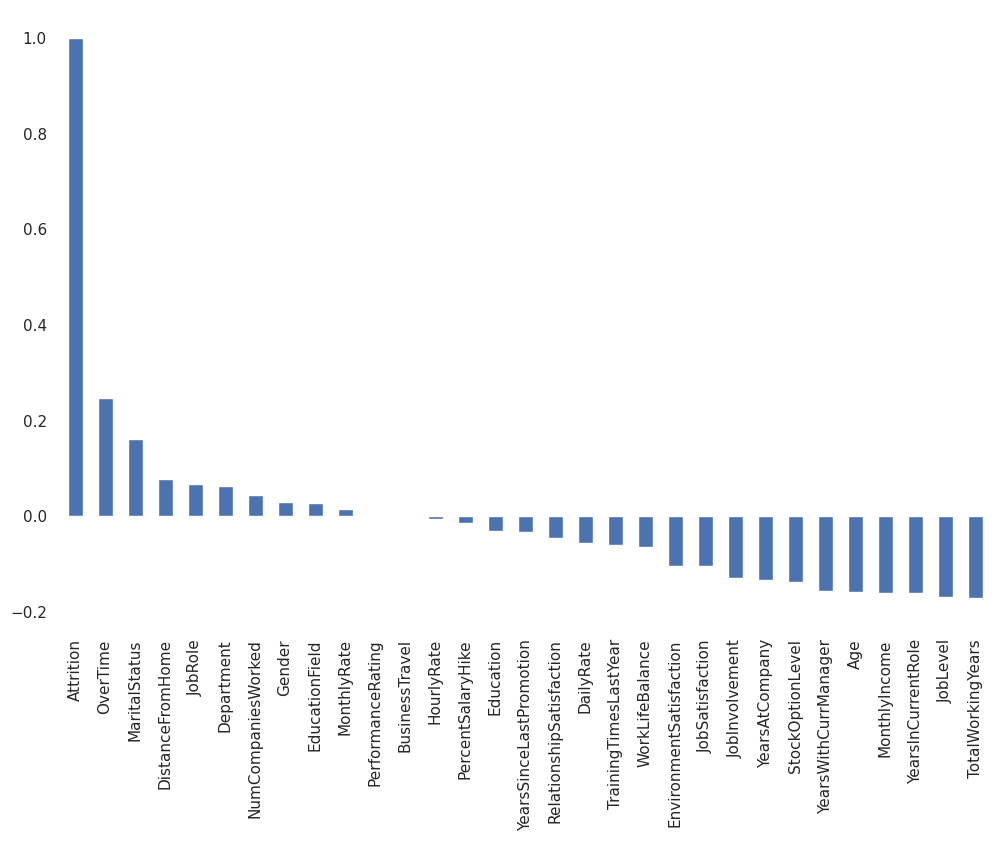

In [ ]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
plt.figure(figsize=(12,8))
correl['Attrition'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# obtener las variables altamente correlacionadas

threshold = 0.7
correlation_matrix = df_hr_converted.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corelation_feat = [column for column in upper.columns if any(upper[column] >= threshold)]
high_correlation = pd.DataFrame(upper.unstack().reset_index())
high_correlation.columns = ['feature1', 'feature2', 'correlation']
high_correlation.dropna(subset=['correlation'], inplace=True)
high_correlation[(high_correlation['correlation'] >= threshold) & (high_correlation['correlation'] < 1)]
high_correlation.sort_values(by='correlation', ascending=False).head(8)




,feature1,feature2,correlation
508,MonthlyIncome,JobLevel,0.950300
756,TotalWorkingYears,JobLevel,0.782208
671,PerformanceRating,PercentSalaryHike,0.773550
760,TotalWorkingYears,MonthlyIncome,0.772893
957,YearsWithCurrManager,YearsAtCompany,0.769212
895,YearsInCurrentRole,YearsAtCompany,0.758754
958,YearsWithCurrManager,YearsInCurrentRole,0.714365
744,TotalWorkingYears,Age,0.680381


* TotalWorkingYears, JobLevel y MonthlyIncome tiene un valor muy alto de correlacion. Eliminamos las otras y nos quedamos con **MonthlyIncome**.

* PercentSalaryHike y PerformanceRating tienen una correlacion de 0.77. Eliminamos las otras y nos quedamos con **PerformanceRating**.

* YearsAtCompany, YearsInCurrentRole y YearsWithCurrManager tiene un valor muy alto de correlacion. Eliminamos las otras y nos quedamos con **YearsAtCompany.**


In [ ]:
cols_to_drop = ['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsWithCurrManager']
df_hr_converted.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
df_hr_converted.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,3,1102,3,1,2,2,2,0,94,3,8,4,3,5993,19479,8,1,3,1,0,0,1,6,0
1,49,0,2,279,2,8,1,2,3,1,61,2,7,2,2,5130,24907,1,0,4,4,1,3,3,10,1
2,37,1,3,1373,2,2,2,5,4,1,92,2,3,3,3,2090,2396,6,1,3,2,0,3,3,0,0
3,33,0,2,1392,2,3,4,2,4,0,56,3,7,3,2,2909,23159,1,1,3,3,0,3,3,8,3
4,27,0,3,591,2,2,1,4,1,1,40,3,3,2,2,3468,16632,9,0,3,4,1,3,3,2,2


In [ ]:
df_hr_converted.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64

**RANDOM FOREST para seleccion de variables**

In [ ]:
X = df_hr_converted.drop('Attrition',1)
y = df_hr_converted['Attrition']


<ipython-input-34-df7902b50e92>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_hr_converted.drop('Attrition',1)


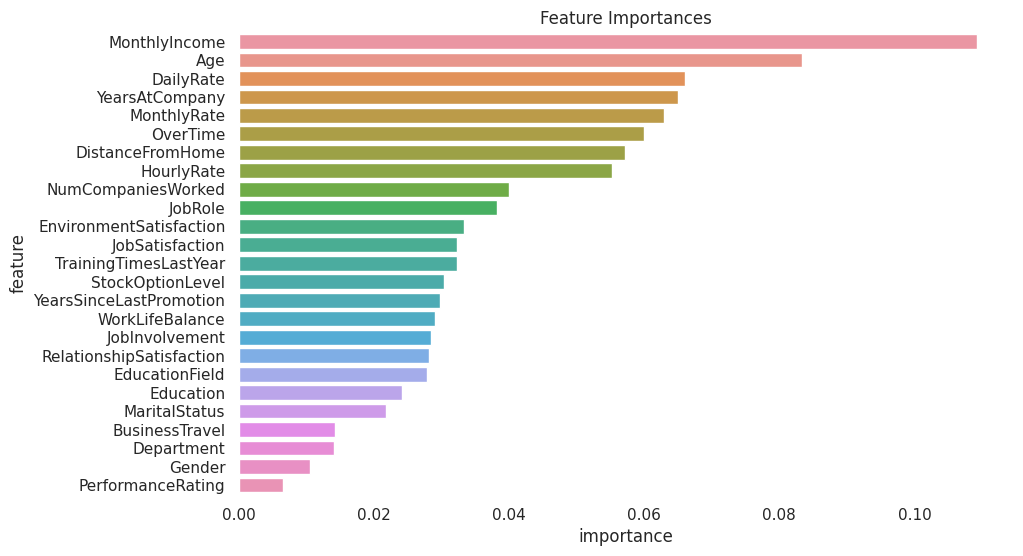

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear un objeto de modelo Random Forest
rf_model = RandomForestClassifier()

# Ajustar el modelo con todo el conjunto de datos
rf_model.fit(X, y)

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Ordenar las características por su importancia descendente
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Visualizar las características y su importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()



In [ ]:
important_features = feature_importances[feature_importances['importance'] > 0.02]['feature'].values
df_hr_x_selected = X[important_features]


# Modelo de Prediccion - LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1176, 25)
(294, 25)


In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#prediccion
predictions=pipe.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

## Evaluar el modelo

In [ ]:
accuracy=accuracy_score(predictions, y_test)
print(accuracy)

0.8673469387755102


In [ ]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       272
           1       0.33      0.73      0.45        22

    accuracy                           0.87       294
   macro avg       0.65      0.80      0.69       294
weighted avg       0.93      0.87      0.89       294



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


# Precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

# Calcular el recall del modelo
recall = recall_score(y_test, predictions)
print("Recall del modelo: {:.2f}%".format(recall * 100))

# Calcular el F1-score del modelo
f1 = f1_score(y_test, predictions)
print("F1-score del modelo: {:.2f}%".format(f1 * 100))

# Generar la matriz de confusión del modelo
cm = confusion_matrix(y_test, predictions)
print("Matriz de confusión del modelo:")
print(cm)

Precisión del modelo: 86.73%
Recall del modelo: 32.65%
F1-score del modelo: 45.07%
Matriz de confusión del modelo:
[[239   6]
 [ 33  16]]


## Observaciones

En este caso, el modelo tiene una precisión del 86.73%, lo que indica que ha acertado en la mayoría de los casos. El recall es un poco más alto (32.65%), lo que sugiere que el modelo ha identificado mejor que el modelo siguiente algunos casos positivos. El F1-score del modelo es de 45.07%, lo que indica una combinación moderada de precisión y recall.

En cuanto a la matriz de confusión, se observa que el modelo ha acertado en la mayoría de los casos negativos y ha logrado identificar mejor algunos casos positivos que el modelo de RandomForestClassifier.

En general, este modelo parece estar sufriendo de cierto underfitting, ya que aún hay margen de mejora en cuanto a la detección de casos positivos en relación al modelo siguiente.

# Modelo de Prediccion - RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

## Evaluar el modelo

In [ ]:
accuracy = rfc.score(X_test, y_test)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))


Precisión del modelo: 84.69%


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

recall = recall_score(y_test, y_pred)
print("Recall del modelo: {:.2f}%".format(recall * 100))

f1 = f1_score(y_test, y_pred)
print("F1-score del modelo: {:.2f}%".format(f1 * 100))

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión del modelo:")
print(cm)


Precisión del modelo: 84.69%
Recall del modelo: 14.29%
F1-score del modelo: 23.73%
Matriz de confusión del modelo:
[[242   3]
 [ 42   7]]


## Observaciones

Se observa una precisión del modelo del 84.01%, lo que indica que el modelo ha acertado en la mayoría de los casos. Sin embargo, el recall es muy bajo (12.24%), lo que sugiere que el modelo no ha identificado correctamente muchos casos positivos y ha dado más falsos negativos. El F1-score del modelo es de 20.34%, lo que indica una combinación de precisión y recall bajas.

En cuanto a la matriz de confusión, se observa que el modelo ha acertado en la mayoría de los casos negativos, pero ha tenido dificultades para detectar los casos positivos.

Esto sugiere que el modelo tiende a estar en un caso de underfitting.

# Conclusión Final

Después de analizar el dataset, se puede concluir que existen ciertos factores que influyen en la decisión de los empleados de abandonar la empresa, como la satisfacción laboral, el compromiso, la carga de trabajo y el salario.

Los empleados con bajos niveles de satisfacción laboral tienen más probabilidades de abandonar la empresa. Sin embargo, la edad no parece ser un factor determinante en la rotación de los empleados.

En cuanto a las diferencias salariales entre hombres y mujeres, se observa que existe una brecha salarial, siendo los hombres los que ganan más en promedio. Esto sugiere que hay una inequidad de género en la empresa y que es necesario tomar medidas para reducir esta brecha.

En cuanto a las hipótesis planteadas, se encontró que la hipótesis de que los empleados con bajos niveles de satisfacción laboral son más propensos a abandonar la empresa es cierta. También se encontró que existe una relación entre la carga de trabajo (determinada analizando otra variables en conjunto) y el abandono de la empresa, aunque no necesariamente es la única causa.

En cuanto a la hipótesis de que los empleados que tienen que viajar largas distancias para llegar al trabajo tienen más probabilidades de abandonar la empresa, no se encontró evidencia clara que la respalde. Por otro lado, se observó que los empleados que ganan más no necesariamente tienen más probabilidades de quedarse en la empresa, sino que otros factores como la satisfacción laboral y el compromiso también son importantes.

Finalmente, se encontró que existe una relación entre las oportunidades de promoción y el abandono de la empresa, sugiriendo que es necesario mejorar y aumentar las oportunidades de carrera para los empleados. En conclusión, se pueden tomar medidas para mejorar la satisfacción laboral, reducir la carga de trabajo y la brecha salarial, y aumentar las oportunidades de promoción para reducir la rotación de los empleados y mejorar el clima laboral en general.